### Veri Yükleme Ve Görselleştirme

In [2]:
# Veri ön işlemeleri için kütüphaneleri import ettik
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [4]:
data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
data.shape

(8732, 8)

In [6]:
data.shape

(8732, 8)

In [7]:
data.info

<bound method DataFrame.info of          slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3        

In [8]:
data.dtypes

slice_file_name     object
fsID                 int64
start              float64
end                float64
salience             int64
fold                 int64
classID              int64
class               object
dtype: object

In [9]:
data_Catecorig=data.select_dtypes(include=["object"])
data_Catecorig.head(5)

,slice_file_name,class
0,100032-3-0-0.wav,dog_bark
1,100263-2-0-117.wav,children_playing
2,100263-2-0-121.wav,children_playing
3,100263-2-0-126.wav,children_playing
4,100263-2-0-137.wav,children_playing


In [10]:
# class değişkeni hata verebiliyordu class olan sutun adı sınıf olarak değiştirdik.
z = ['slice_file_name','fsID','start','end','salience','fold','classID','sinif'] 
data.columns = z
data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,sinif
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
data_Catecorig["class"].value_counts() # Her sınıfa ait kaç örnek var?

children_playing    1000
air_conditioner     1000
drilling            1000
dog_bark            1000
street_music        1000
jackhammer          1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [12]:
data.isnull().sum() #eksik veri yok

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
sinif              0
dtype: int64

<AxesSubplot:>

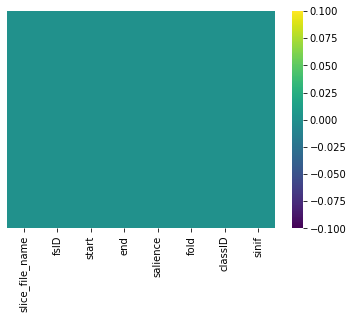

In [13]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='sinif'>

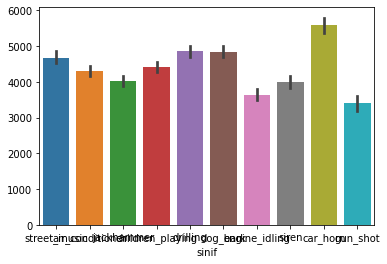

In [14]:
from pandas.api.types import CategoricalDtype
class_categori=["street_music","air_conditioner","jackhammer","children_playing","drilling","dog_bark","engine_idling","siren","car_horn","gun_shot"]
data.sinif=data.sinif.astype(CategoricalDtype(categories=class_categori,ordered=True))
data.sinif.head(1)
sns.barplot(x="sinif",y=data.sinif.index,data=data,tick_label="sinif")

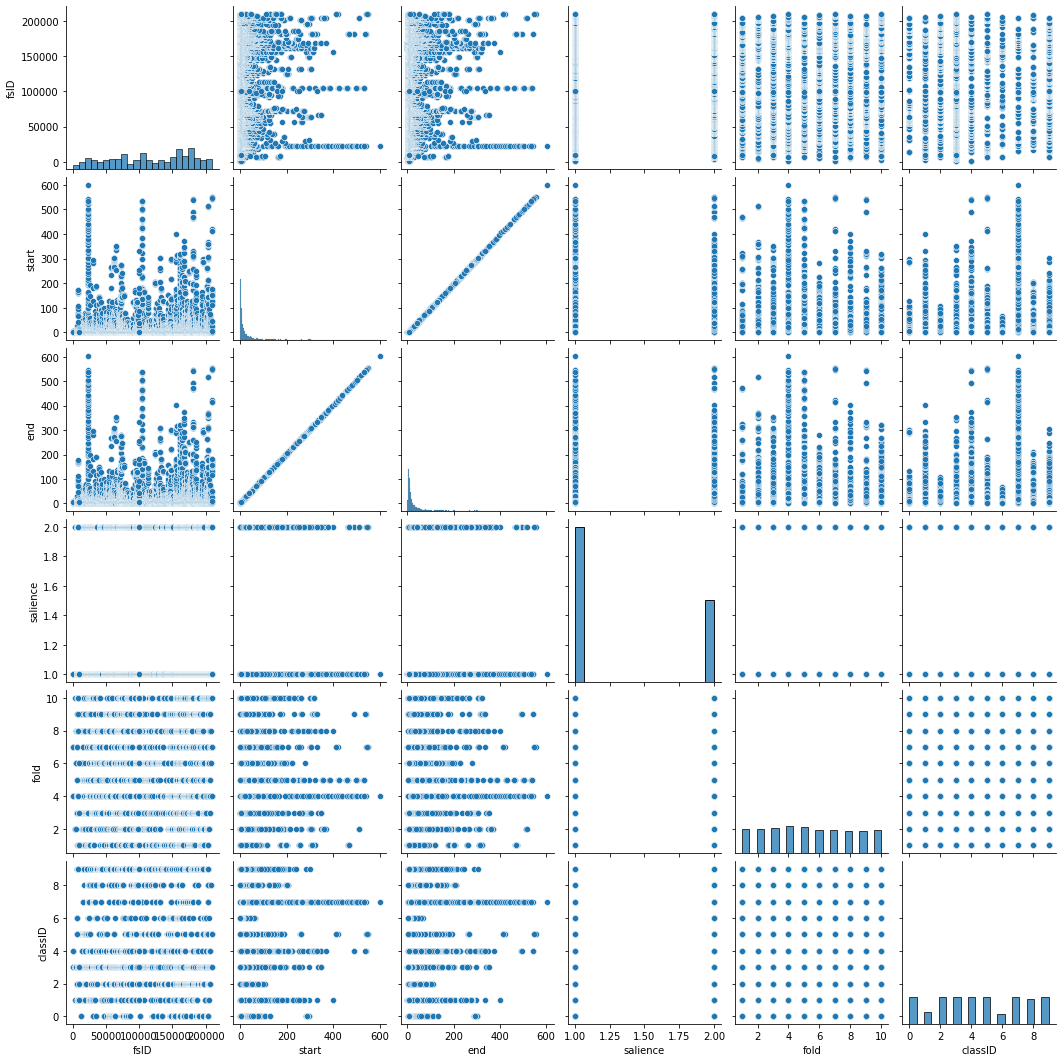

In [15]:
sns.pairplot(data)

In [ ]:
!pip install librosa

In [16]:
import librosa 
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa.display
import os

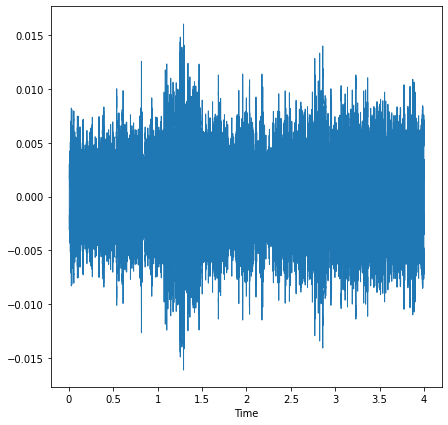

In [17]:
filename="UrbanSound8K/audio/fold5/100263-2-0-121.wav"
plt.figure(figsize=(7,7))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename) #herhangi bir audio datasının görselleştirimi.

In [18]:
h, p = librosa.effects.hpss(data)
sph = librosa.feature.melspectrogram(h, sr=sample_rate)
sphc = librosa.power_to_db(sph,ref=np.max)

<ipython-input-18-1b022191216c>:2: FutureWarning: Pass y=[-0.00125268 -0.00153323 -0.00083077 ... -0.0006171  -0.00103463
 -0.00097683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sph = librosa.feature.melspectrogram(h, sr=sample_rate)


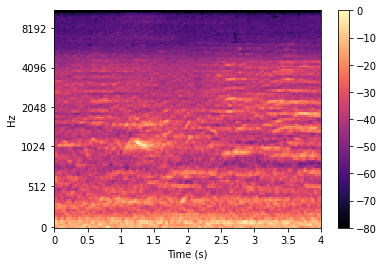

In [19]:
librosa.display.specshow(sphc,y_axis='mel', x_axis='s', sr=sample_rate)
plt.colorbar()

Şekil:


<ipython-input-20-f68424389ef2>:1: FutureWarning: Pass y=[-0.00266719 -0.00306487 -0.00157375 ... -0.0012674  -0.00186613
 -0.00208547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc=librosa.feature.mfcc(data,sr=sample_rate)


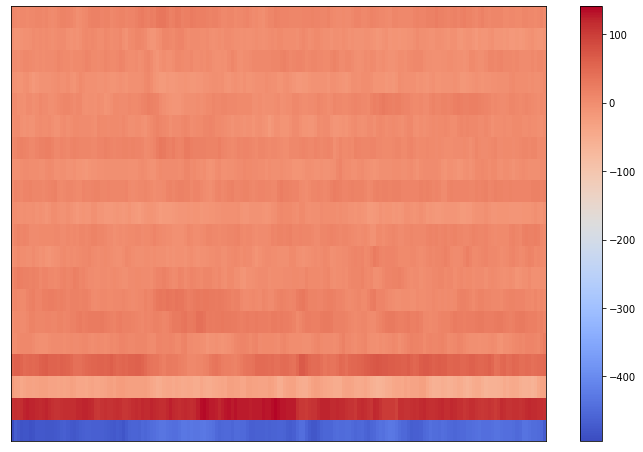

In [20]:
mfcc=librosa.feature.mfcc(data,sr=sample_rate)
print("Şekil:")
plt.figure(figsize=(12,8))
librosa.display.specshow(mfcc)
plt.colorbar()

(1, 173)


<ipython-input-21-052ad5bccb50>:1: FutureWarning: Pass y=[-0.00266719 -0.00306487 -0.00157375 ... -0.0012674  -0.00186613
 -0.00208547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mrk=librosa.feature.spectral_centroid(data)


Text(0, 0.5, 'Hz')

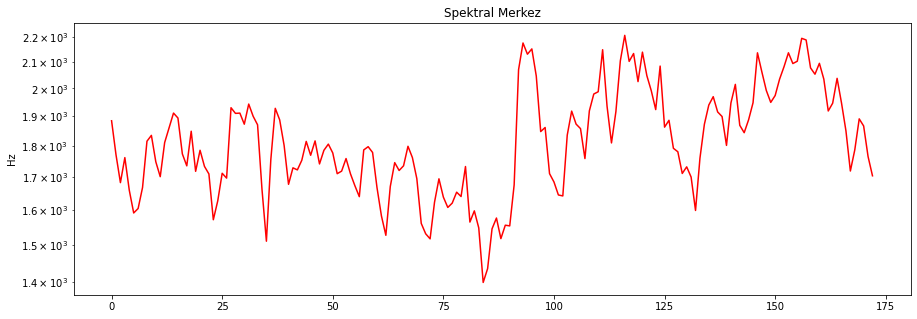

In [21]:
mrk=librosa.feature.spectral_centroid(data)
print(mrk.shape)
plt.figure(figsize=(15,5))
plt.title("Spektral Merkez")
plt.semilogy(mrk.T, "r")
plt.ylabel("Hz")